# Assignment 8
## Applied Machine Learning

Andrew Chan 
EBE869

This assignment assumes that `assignment08_dataset.csv` is in the same directory as this notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df_train = pd.read_csv('assignment08_dataset.csv')


In [2]:
df_train

,f1,f2
0,0.494261,1.451067
1,-1.428081,-0.837064
2,0.338559,1.038759
3,0.119001,-1.053976
4,1.122425,1.774937
...,...,...
745,0.505927,1.213927
746,-1.640461,-0.469973
747,-0.057139,-0.909261
748,-1.169394,0.039597


In [3]:
type(df_train['f1'][0])

numpy.float64

In [4]:
X = df_train.values

In [5]:
X.shape

(750, 2)

# 1. [10 pts] How many species must be there in the dataset?
(For the rest of this assignment, use that number as the number-of-clusters parameter in methods such as KMeans)

centroids [[-1.25046574 -0.67198973]
 [ 0.67135661  0.36078137]]


Text(0, 0.5, 'f2')

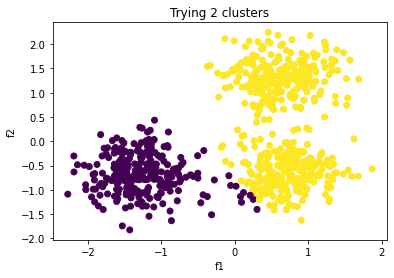

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print('centroids', kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Trying 2 clusters")
plt.xlabel('f1')
plt.ylabel('f2')

centroids [[ 0.6954587  -0.64442334]
 [-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]]


Text(0, 0.5, 'f2')

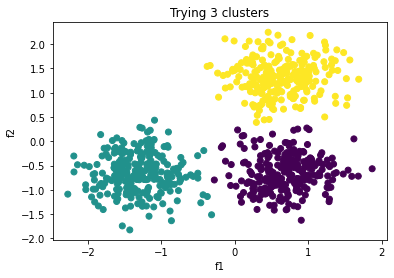

In [7]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print('centroids', kmeans.cluster_centers_)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Trying 3 clusters")
plt.xlabel('f1')
plt.ylabel('f2')

## Answer: 3 species

# 2. [10 pts] Find the rough feature ranges to classify these species correctly. 
It might be a good idea to do this step visually from some data plots.

Visually adding horizontal and vertical lines:

Text(0, 0.5, 'f2')

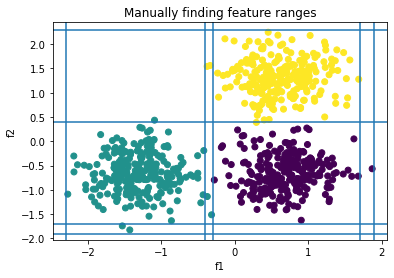

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
# horizontal lines
plt.axhline(0.4)
plt.axhline(2.3)
plt.axhline(-1.9)
plt.axhline(-1.7)
# vertical lines
plt.axvline(-2.3)
plt.axvline(-0.4)
plt.axvline(-0.3)
plt.axvline(1.7)
plt.axvline(1.9)
plt.title("Manually finding feature ranges")
plt.xlabel('f1')
plt.ylabel('f2')

## Answer: 
**Cluster ranges:**
* Cluster 0
    * Centroid: [-1.30266211, -0.65704205]
    * f1 range: [-2.3, -0.3]
    * f2 range: [-1.9, 0.4]
* Cluster 1
    * Centroid: [ 0.62260555,  1.3172598 ]
    * f1 range: [-0.4, 1.7]
    * f2 range: [0.4, 2.3]
* Cluster 2
    * Centroid: [ 0.6954587,  -0.64442334]
    * f1 range: [-0.3, 1.9]
    * f2 range: [-1.7, 0.4]

# 3. Clean the points that are around the boundaries of the cluster 
(these points might be due to errors, anomalies, or they are simply outliers). 
This step is done to refine feature boundaries so that a scientist can classify the species manually, reliably, and with a high level generalization. (An example statement, "Species 1 has feature 1 in the range of [0-1.5]")

Isolate points at boundaries:

In [9]:
indices_to_remove = []

Horizontal between clusters:

In [10]:
for i in range(df_train.shape[0]):
    if (df_train.iloc[i]['f2'] > 0.2) & (df_train.iloc[i]['f2']< 0.6):
       # print( df_train.iloc[i] )
        # add to indices to remove
        indices_to_remove.append(i)

Vertically between clusters

In [11]:
for i in range(df_train.shape[0]):
    if (df_train.iloc[i]['f1'] > -0.6) & (df_train.iloc[i]['f1']<-0.3):
        indices_to_remove.append(i)

Vertical right side

In [12]:
for i in range(df_train.shape[0]):
    if (df_train.iloc[i]['f1'] > 1.5):
        indices_to_remove.append(i)

Vertical left side

In [13]:
for i in range(df_train.shape[0]):
    if (df_train.iloc[i]['f1'] < -2.1):
        indices_to_remove.append(i)

Turn list into a set to remove duplicates:

In [14]:
indices_to_remove = set(indices_to_remove)

In [15]:
indices_to_remove = list(indices_to_remove)

In [16]:
len(indices_to_remove)

39

Remove points:

In [17]:
df_train_manual = df_train.drop(df_train.index[indices_to_remove])

In [18]:
df_train_manual.shape

(711, 2)

In [19]:
X_manual = df_train_manual.values

centroids [[-1.32164017 -0.66663081]
 [ 0.61268813  1.33634127]
 [ 0.67444145 -0.66579689]]


Text(0, 0.5, 'f2')

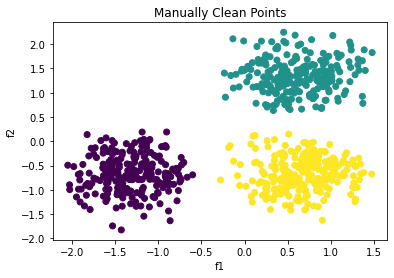

In [20]:
kmeans_manual = KMeans(n_clusters=3, random_state=42).fit(X_manual)
print('centroids', kmeans_manual.cluster_centers_)
y_pred_manual = kmeans_manual.predict(X_manual)
plt.scatter(X_manual[:, 0], X_manual[:, 1], c=y_pred_manual)
plt.title("Manually Clean Points")
plt.xlabel('f1')
plt.ylabel('f2')

# 4. [20 pts] Use K-means clustering to find anomalies 
(Hint: find cluster data points that are far to the centroids)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print('centroids', kmeans.cluster_centers_)
y_pred_kmeans = kmeans.predict(X)

centroids [[-1.30266211 -0.65704205]
 [ 0.62260555  1.3172598 ]
 [ 0.6954587  -0.64442334]]


(-2.4817198818965, 2.0776836416465, -2.0272804207814996, 2.4492739351515)

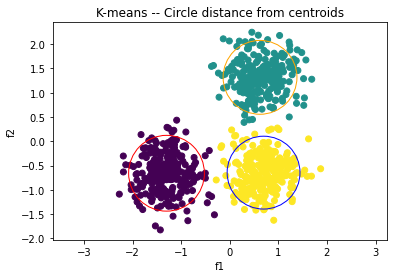

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans)

# Cluster 0
circle0 = plt.Circle((-1.30266211, -0.65704205), 0.78, color='red', fill=False)
ax = plt.gca()
ax.add_patch(circle0)
# Cluster 1
circle1 = plt.Circle((0.62260555,  1.3172598), 0.76, color='orange', fill=False)
ax.add_patch(circle1)
# Cluster 2
circle2 = plt.Circle((0.6954587,  -0.64442334), 0.75, color='blue', fill=False)
ax.add_patch(circle2)

plt.title("K-means -- Circle distance from centroids")
plt.xlabel('f1')
plt.ylabel('f2')
plt.axis("equal") 

Get indices of anomalies:

In [23]:
indices_to_remove_k_means_cluster0 = []
indices_to_remove_k_means_cluster1 = []
indices_to_remove_k_means_cluster2 = []

Use numpy to get Euclidean Distance

In [24]:
# loop through each of the samples
for i in range(df_train.shape[0]):
    sample = df_train.iloc[i].values
    # check which cluster it belongs to
    if kmeans.predict(sample.reshape(1,-1)) == 0 and np.linalg.norm(sample-np.array((-1.30266211, -0.65704205))) > 0.78:
        indices_to_remove_k_means_cluster0.append(i)
    elif kmeans.predict(sample.reshape(1,-1)) == 1 and np.linalg.norm(sample-np.array((0.62260555,  1.3172598))) > 0.76:
        indices_to_remove_k_means_cluster1.append(i)
    elif kmeans.predict(sample.reshape(1,-1)) == 2 and np.linalg.norm(sample-np.array((0.6954587,  -0.64442334))) > 0.75:
        indices_to_remove_k_means_cluster2.append(i)

In [25]:
len(indices_to_remove_k_means_cluster0)
X_cluster0_anomalies = df_train.iloc[indices_to_remove_k_means_cluster0].values

In [26]:
len(indices_to_remove_k_means_cluster1)
X_cluster1_anomalies = df_train.iloc[indices_to_remove_k_means_cluster1].values

In [27]:
len(indices_to_remove_k_means_cluster2)
X_cluster2_anomalies = df_train.iloc[indices_to_remove_k_means_cluster2].values

Flatten anomalous points:

In [28]:
k_means_anomaly = indices_to_remove_k_means_cluster0 + indices_to_remove_k_means_cluster1 + indices_to_remove_k_means_cluster2

Remove anomalous points:

In [29]:
df_train_no_anomaly = df_train.drop(df_train.index[k_means_anomaly])
X_k_means = df_train_no_anomaly.values
y_pred_k_means = kmeans.predict(X_k_means)

(-2.4817198818965, 2.0776836416465, -2.0272804207814996, 2.4492739351515)

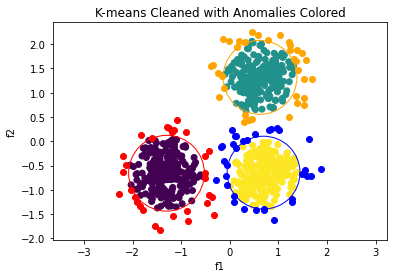

In [30]:
plt.scatter(X_k_means[:, 0], X_k_means[:, 1], c=y_pred_k_means)

# Cluster 0
plt.scatter(X_cluster0_anomalies[:, 0], X_cluster0_anomalies[:, 1], c='red')
circle0 = plt.Circle((-1.30266211, -0.65704205), 0.78, color='red', fill=False)
ax = plt.gca()
ax.add_patch(circle0)

# Cluster 1
plt.scatter(X_cluster1_anomalies[:, 0], X_cluster1_anomalies[:, 1], c='orange')
circle1 = plt.Circle((0.62260555,  1.3172598), 0.76, color='orange', fill=False)
ax.add_patch(circle1)

# Cluster 2
plt.scatter(X_cluster2_anomalies[:, 0], X_cluster2_anomalies[:, 1], c='blue')

circle2 = plt.Circle((0.6954587,  -0.64442334), 0.75, color='blue', fill=False)
ax.add_patch(circle2)

plt.title("K-means Cleaned with Anomalies Colored")
plt.xlabel('f1')
plt.ylabel('f2')
plt.axis("equal") 

# 5. [20 pts] Use DBSCAN clustering to find anomalies in the full dataset as an alternative to (Q4.)

In [31]:
from sklearn.cluster import DBSCAN

In [32]:
db = DBSCAN(eps=0.2, min_samples=15)
y_pred_db = db.fit_predict(X)
df_y_pred = pd.DataFrame(y_pred_db,columns = ['cluster'])

In [33]:
df_y_pred.head()

,cluster
0,0
1,1
2,0
3,2
4,-1


In [34]:
df_y_pred.value_counts()

cluster
 1         209
 2         205
 0         189
-1         147
dtype: int64

In [35]:
df_y_pred.shape

(750, 1)

(-2.4817198818965, 2.0776836416465, -2.0272804207814996, 2.4492739351515)

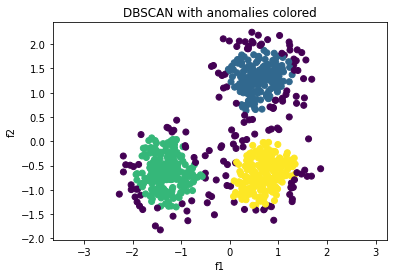

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred_db)

plt.title("DBSCAN with anomalies colored")
plt.xlabel('f1')
plt.ylabel('f2')
plt.axis("equal") 

In [37]:
df_y_pred.head()

,cluster
0,0
1,1
2,0
3,2
4,-1


In [38]:
df_db = pd.merge(df_train, df_y_pred, left_index=True, right_index=True)

In [39]:
df_db.head()

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
4,1.122425,1.774937,-1


In [40]:
df_db.shape

(750, 3)

In [41]:
indices_to_remove_db = df_db[ df_db['cluster'] == -1 ].index 
df_db.drop(indices_to_remove_db, inplace = True) 

In [42]:
df_db.shape

(603, 3)

In [43]:
df_db['cluster'].value_counts()

1    209
2    205
0    189
Name: cluster, dtype: int64

In [44]:
df_db.head()

,f1,f2,cluster
0,0.494261,1.451067,0
1,-1.428081,-0.837064,1
2,0.338559,1.038759,0
3,0.119001,-1.053976,2
6,-1.301548,-0.762062,1


# 6. [30 pts] Now using the cleaned dataset by a method of your choice, develop a decision tree classifier to model the species and show the model decision tree

I will use kmeans cleaned dataset:

In [45]:
X_k_means.shape

(651, 2)

In [46]:
y_pred_k_means.shape

(651,)

In [47]:
from sklearn.tree import DecisionTreeClassifier
species_clf = DecisionTreeClassifier(random_state=42)
model = species_clf.fit(X_k_means, y_pred_k_means)

In [48]:
classes = list(map(lambda x: str(x), list(np.unique(y_pred_k_means)))) 

graphviz version= 0.16


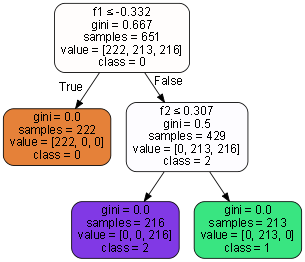

In [49]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import run, PIPE
import graphviz
print(f'graphviz version= {graphviz.__version__}')
# export_graphviz will generate a DOT image file in the folder with this notebook
dot_data = export_graphviz(species_clf,
                           out_file='species_tree.dot',
                           feature_names=df_train.columns,
                           class_names=classes,
                           filled=True,
                           rounded=True,
                           special_characters=True)

# Convert the DOT file to PNG
run(['dot', '-Tpng', 'species_tree.dot', '-o', 'species_tree.png', '-Gdpi=60'], shell=True)

# Display the decision tree
Image(filename = 'species_tree.png')

# 7. [10 pts] Show that, in fact, it helped to clean the outliers as above, before generating the decision tree.